In [2]:
import pandas as pd
DATA_FOLDER_PATH = "/home/bilal326/Desktop/Time_Series/data/london_smart_meters"
block_df = pd.read_parquet(f"{DATA_FOLDER_PATH}/preprocessed/london_smart_meters_merged_block_0-7.parquet")

In [4]:
block_df.head(2)

,LCLid,start_timestamp,frequency,energy_consumption,series_length,stdorToU,Acorn,Acorn_grouped,file,holidays,...,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,MAC000002,2012-10-13,30min,"[0.263, 0.2689999999999999, 0.275, 0.256, 0.21...",24144,Std,ACORN-A,Affluent,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[186, 186, 188, 188, 190, 190, 203, 203, 206, ...","[8.78, 8.78, 8.27, 8.27, 7.87, 7.87, 7.89, 7.8...","[6.28, 6.28, 6.21, 6.21, 6.22, 6.22, 6.76, 6.7...","[1007.7, 1007.7, 1007.36, 1007.36, 1006.73, 10...","[7.55, 7.55, 7.34, 7.34, 6.75, 6.75, 6.89, 6.8...","[2.28, 2.28, 1.81, 1.81, 1.95, 1.95, 1.83, 1.8...","[rain, rain, rain, rain, rain, rain, rain, rai...","[clear-night, clear-night, clear-night, clear-...","[0.84, 0.84, 0.87, 0.87, 0.89, 0.89, 0.93, 0.9...","[Clear, Clear, Clear, Clear, Partly Cloudy, Pa..."
1,MAC000246,2012-01-01,30min,"[0.509, 0.317, 0.253, 0.249, 0.93, 0.607, 0.10...",37872,Std,ACORN-A,Affluent,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[229, 229, 238, 238, 229, 229, 231, 231, 227, ...","[12.12, 12.12, 12.59, 12.59, 12.45, 12.45, 12....","[10.97, 10.97, 11.02, 11.02, 11.04, 11.04, 10....","[1008.1, 1008.1, 1007.88, 1007.88, 1007.95, 10...","[12.12, 12.12, 12.59, 12.59, 12.45, 12.45, 12....","[5.9, 5.9, 6.06, 6.06, 5.31, 5.31, 4.68, 4.68,...","[rain, rain, rain, rain, rain, rain, rain, rai...","[partly-cloudy-night, partly-cloudy-night, clo...","[0.93, 0.93, 0.9, 0.9, 0.91, 0.91, 0.93, 0.93,...","[Mostly Cloudy, Mostly Cloudy, Overcast, Overc..."


In [5]:
!wget https://raw.githubusercontent.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/refs/heads/main/src/utils/data_utils.py

--2025-06-24 23:14:54--  https://raw.githubusercontent.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/refs/heads/main/src/utils/data_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17722 (17K) [text/plain]
Saving to: ‘data_utils.py’

data_utils.py       100%[===================>]  17.31K  --.-KB/s    in 0.1s    

2025-06-24 23:14:55 (125 KB/s) - ‘data_utils.py’ saved [17722/17722]



In [ ]:
# converting data into expanded form
# we will just extract one block from these seven blocks.

from data_utils import compact_to_expanded
exp_block_df = compact_to_expanded(block_df[block_df.file=="block_7"], timeseries_col = 'energy_consumption',\
                                   static_cols = ["frequency", "series_length", "stdorToU", "Acorn", "Acorn_grouped", "file"],\
                                   time_varying_cols = ['holidays', 'visibility', 'windBearing', 'temperature', 'dewPoint', 'pressure', \
                                                        'apparentTemperature', 'windSpeed', 'precipType', 'icon', 'humidity', 'summary'],\
                                                        ts_identifier = "LCLid")

/home/bilal326/Desktop/Time_Series/chp02/data_utils.py:6: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:00<00:00, 77.34it/s]


In [8]:
exp_block_df.head()

,timestamp,LCLid,energy_consumption,frequency,series_length,stdorToU,Acorn,Acorn_grouped,file,holidays,...,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,2012-01-01 00:00:00,MAC000050,0.175,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,229,12.12,10.97,1008.10,12.12,5.90,rain,partly-cloudy-night,0.93,Mostly Cloudy
1,2012-01-01 00:30:00,MAC000050,0.212,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,229,12.12,10.97,1008.10,12.12,5.90,rain,partly-cloudy-night,0.93,Mostly Cloudy
2,2012-01-01 01:00:00,MAC000050,0.313,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,238,12.59,11.02,1007.88,12.59,6.06,rain,cloudy,0.90,Overcast
3,2012-01-01 01:30:00,MAC000050,0.302,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,238,12.59,11.02,1007.88,12.59,6.06,rain,cloudy,0.90,Overcast
4,2012-01-01 02:00:00,MAC000050,0.257,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,229,12.45,11.04,1007.95,12.45,5.31,rain,partly-cloudy-night,0.91,Mostly Cloudy


In [10]:
plot_df = pd.pivot_table(exp_block_df, index="timestamp", columns="LCLid", values="energy_consumption")

In [12]:
plot_df.head()

LCLid,MAC000050,MAC000063,MAC000073,MAC000084,MAC000193,MAC000194,MAC000289,MAC000317,MAC000619,MAC000632,...,MAC004385,MAC004386,MAC004389,MAC004409,MAC004628,MAC004637,MAC004714,MAC004814,MAC004990,MAC005370
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,0.175,0.048,0.054,0.319,0.368,0.064,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:30:00,0.212,0.047,0.057,0.312,0.386,0.077,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 01:00:00,0.313,0.047,0.058,0.330,0.170,0.124,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 01:30:00,0.302,0.047,0.166,0.236,0.021,0.043,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 02:00:00,0.257,0.048,0.089,0.202,0.038,0.024,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
import missingno as msno
%matplotlib inline

/home/bilal326/Desktop/Time_Series/venv/lib/python3.10/site-packages/missingno/missingno.py:106: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_array = pd.date_range(df.index[0], df.index[-1],
/home/bilal326/Desktop/Time_Series/venv/lib/python3.10/site-packages/missingno/missingno.py:109: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_ticks = pd.date_range(df.index[0], df.index[-1],


<Axes: >

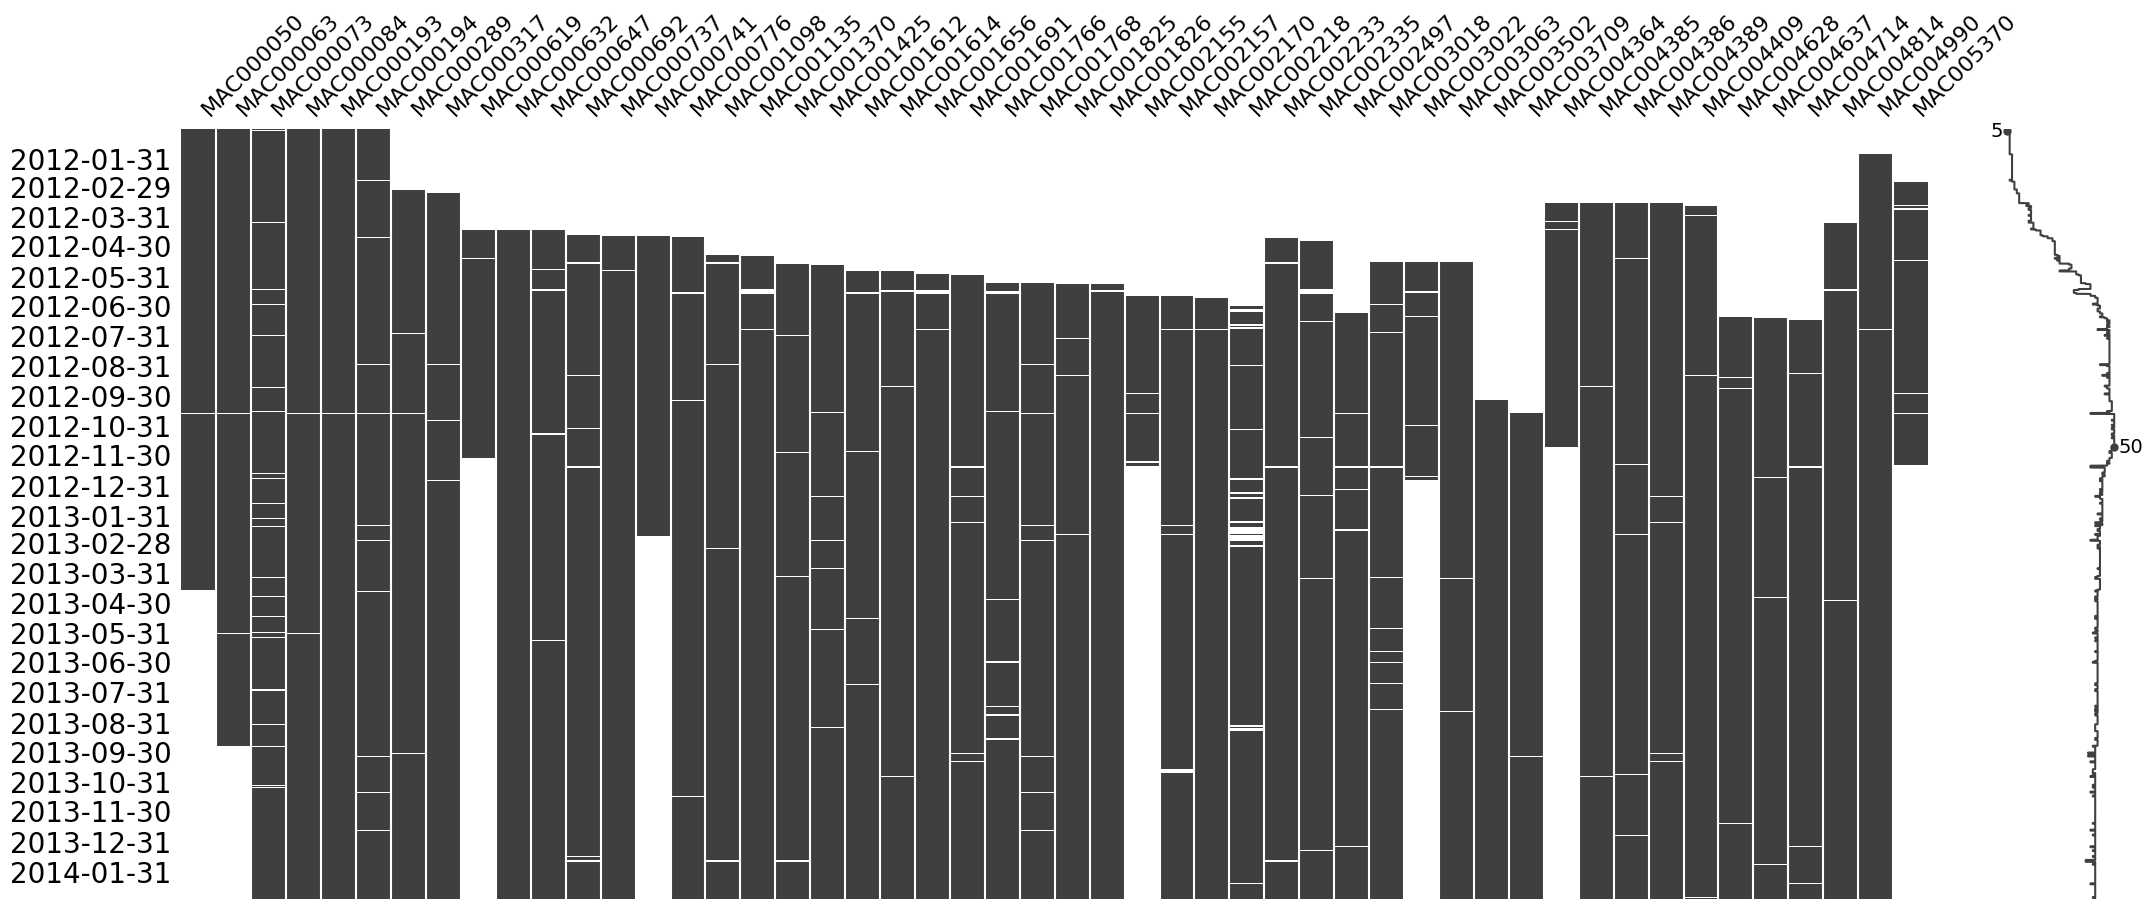

In [11]:
msno.matrix(plot_df, freq="M")

The big white gaps we can see at the beginning of many of the time series show that data collection for those consumers started later than the others.

/home/bilal326/Desktop/Time_Series/venv/lib/python3.10/site-packages/missingno/missingno.py:106: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_array = pd.date_range(df.index[0], df.index[-1],
/home/bilal326/Desktop/Time_Series/venv/lib/python3.10/site-packages/missingno/missingno.py:109: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_ticks = pd.date_range(df.index[0], df.index[-1],


<Axes: >

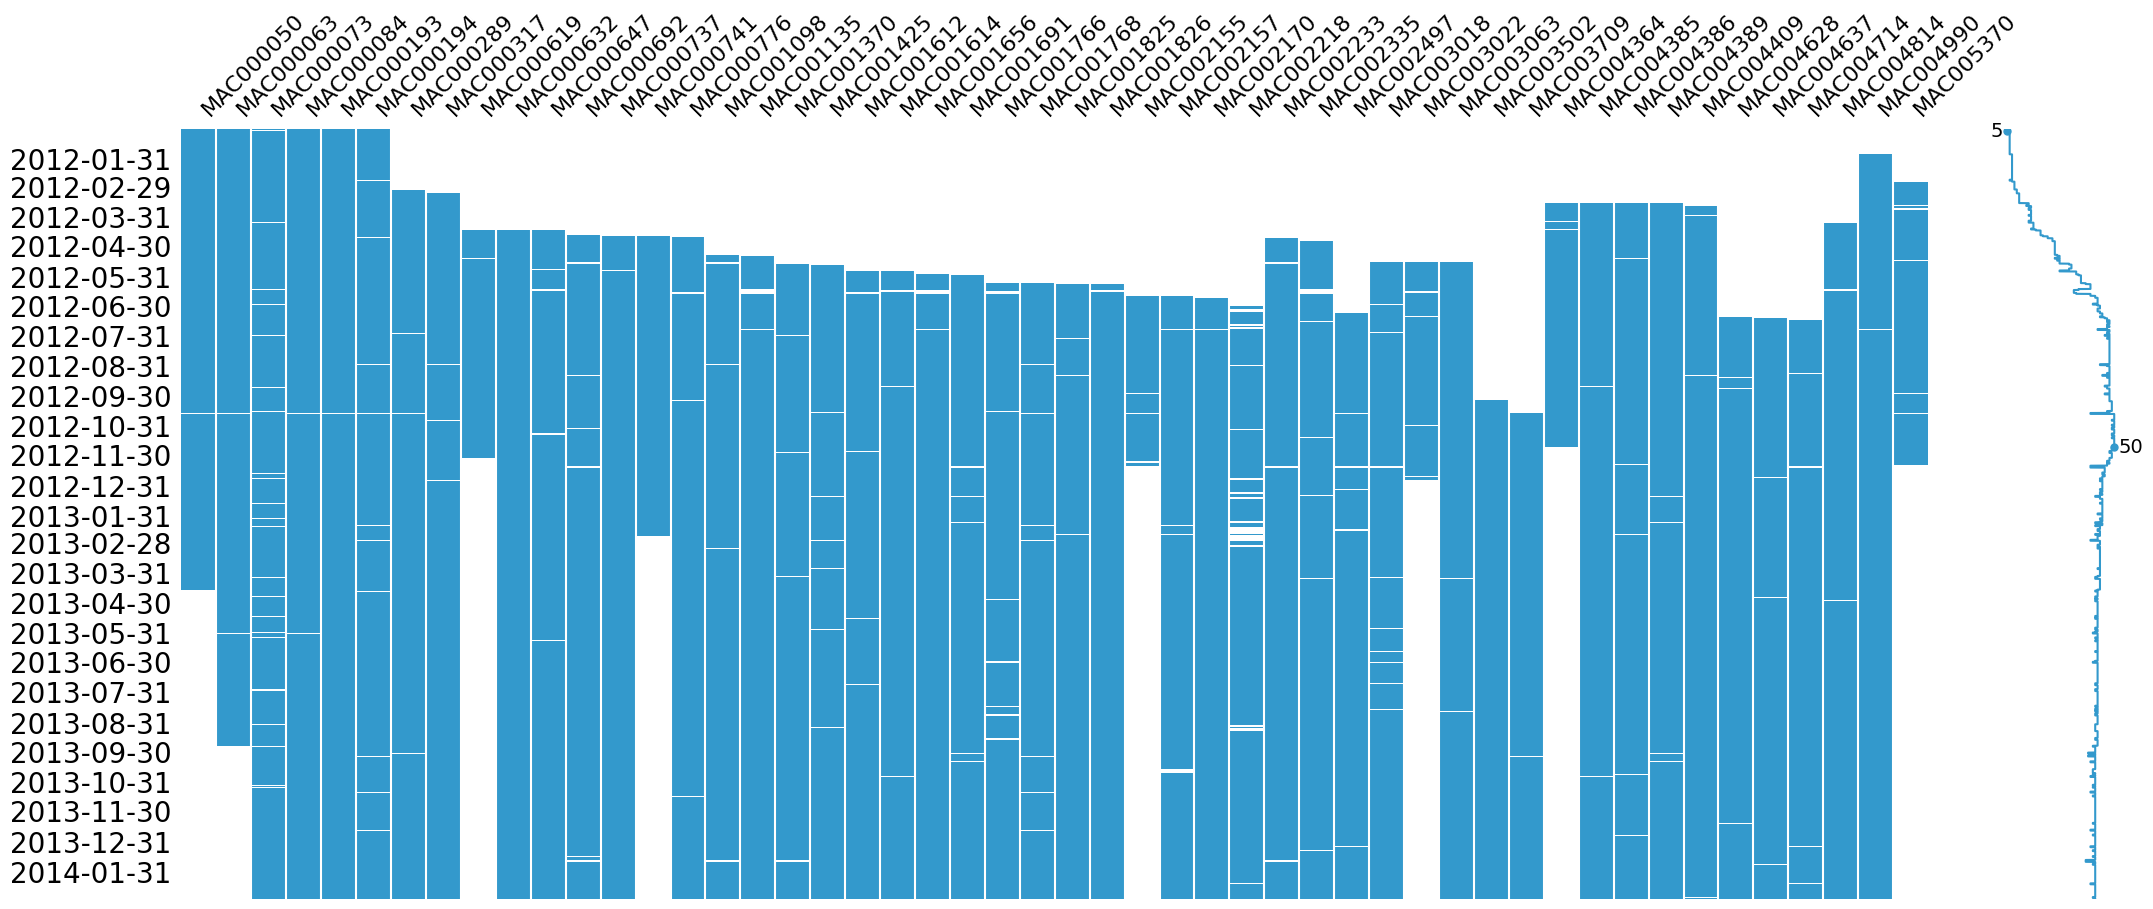

In [13]:
msno.matrix(plot_df, freq="M", color=(0.2, 0.6, 0.8))  # RGB values between 0 and 1